In [1]:
sys.path.append('C:\\Users\\lenovo\\git')

import sys

import pandas as pd

import random

from rnn.data.countlanguage.anbn import anbn

In [4]:
def predict(feature, padding):
    d = {'a': 2, 'b': 4, 'e': 1}
    length = len(feature)
    shex = hex(d['a'] + d['e'])
    ahex = hex(d['a'] + d['b'])
    ehex = hex(d['e'])
    bhex = [hex(d['b']), hex(d['e'])]
    label = ''
    for i, c in enumerate(feature):
        if c == 'a':
            label += ahex
        elif i == length-1:
            label += bhex[1]
        else:
            label += bhex[0]
    label = shex + label + ehex + ehex*(padding-length-2)
    fea = 's' + feature + 'e' + 'e'*(padding-length-2)
    return fea, label

def positive(minlen, maxlen):
    rmin = (minlen - 2 )//2
    rmax = (maxlen - 2 )//2
    r = random.randint(rmin+1, rmax)
    return 'a'*r + 'b'*r

def generate(count, minlen, maxlen):
    li = list()
    c = 0
    while c < count:
        s = positive(minlen, maxlen)
        sp, pp = predict(s, maxlen)
        li.append((sp, pp))
        c += 1
    return li

## generate train

In [56]:

l = generate(20000, 0, 32)

df = pd.DataFrame(l)

df.to_csv('anbn_train', header=None, index=None)

## generate test1

In [59]:
l = generate(1000, 0, 32)

df = pd.DataFrame(l)

df.to_csv('anbn_test1', header=None, index=None)

## generate test2

In [60]:
l = generate(1000, 32, 64)

df = pd.DataFrame(l)

df.to_csv('anbn_test2', header=None, index=None)

## generate test3

In [61]:
l = generate(1000, 64, 128)

df = pd.DataFrame(l)

df.to_csv('anbn_test3', header=None, index=None)

## generate test4

In [65]:
l = generate(1000, 128, 256)

df = pd.DataFrame(l)

df.to_csv('anbn_test4', header=None, index=None)

## generate test5

In [13]:
l = generate(1000, 256, 512)

df = pd.DataFrame(l)

df.to_csv('anbn_test5', header=None, index=None)

# check

In [23]:
import matplotlib.pyplot as plt

In [24]:
def checkdistribute(ls):
    lens = list(map(lambda x:len(x[x.find('s')+1: x.find('e')])//2, ls))
    plt.hist(lens)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
import numpy as np

In [1]:
# balance data

In [4]:
anbn = pd.read_csv('anbn_train', header=None, index_col=None)

anbnl = anbn.values.tolist()

In [6]:
anbnt = list(map(lambda x:(x[0], x[1]), anbnl))

In [8]:
anbns = set(anbnt)

In [10]:
anbnl = list(anbns)

In [12]:
anbnl = anbnl * (20000 // 15 + 1)

In [18]:
anbndf = pd.DataFrame(anbnl)

In [21]:
anbndfdf = anbndf.reindex(np.random.permutation(range(len(anbndf))))

In [22]:
anbndfdfdf = anbndfdf.sample(20000)

In [24]:
anbndfdfdf.to_csv('anbn_train', header=None, index=None)

<BarContainer object of 15 artists>

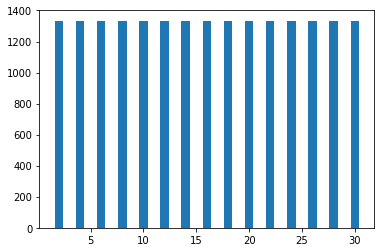

In [25]:
anbn = pd.read_csv('anbn_train', header=None, index_col=None)

anbnl = anbn.values.tolist()

anbnll = list(map(lambda x: len(x[0][x[0].find('s')+1: x[0].find('e')]), anbnl))

from collections import defaultdict
anbnd = defaultdict(lambda: 0)
for i in anbnll:
    anbnd[i] += 1

plt.bar(anbnd.keys(), anbnd.values())